In [13]:
import polars as pl
import seaborn as sns
from matplotlib import pyplot as plt

In [14]:
df_anage = pl.read_csv("../../data/anage.csv", infer_schema_length=1000)
df_earthquakes = pl.read_csv("../../data/EarthquakesChile_2000-2024.csv", try_parse_dates=True)

1. Muestra mediante un gráfico de líneas la cantidad de sismos totales por mes en el año 2010 para las regiones de Bío-Bío, Maule, O'Higgins y Ñuble. Añade los marcadores y utiliza diferentes estilos de línea para cada región.

In [15]:
regions = ["Bío-Bío", "Maule", "Libertador General Bernardo O'Hi", "Ñuble"]
df_earthquakes_by_month_2010 = (
    df_earthquakes.filter(
        pl.col("Region").is_in(regions),
        pl.col("Date").dt.year() == 2010,
    )
    .group_by("Region", Month=pl.col("Date").dt.month())
    .len("n")
)

Text(0.5, 1.0, 'Earthquakes per month in 2010 by region')

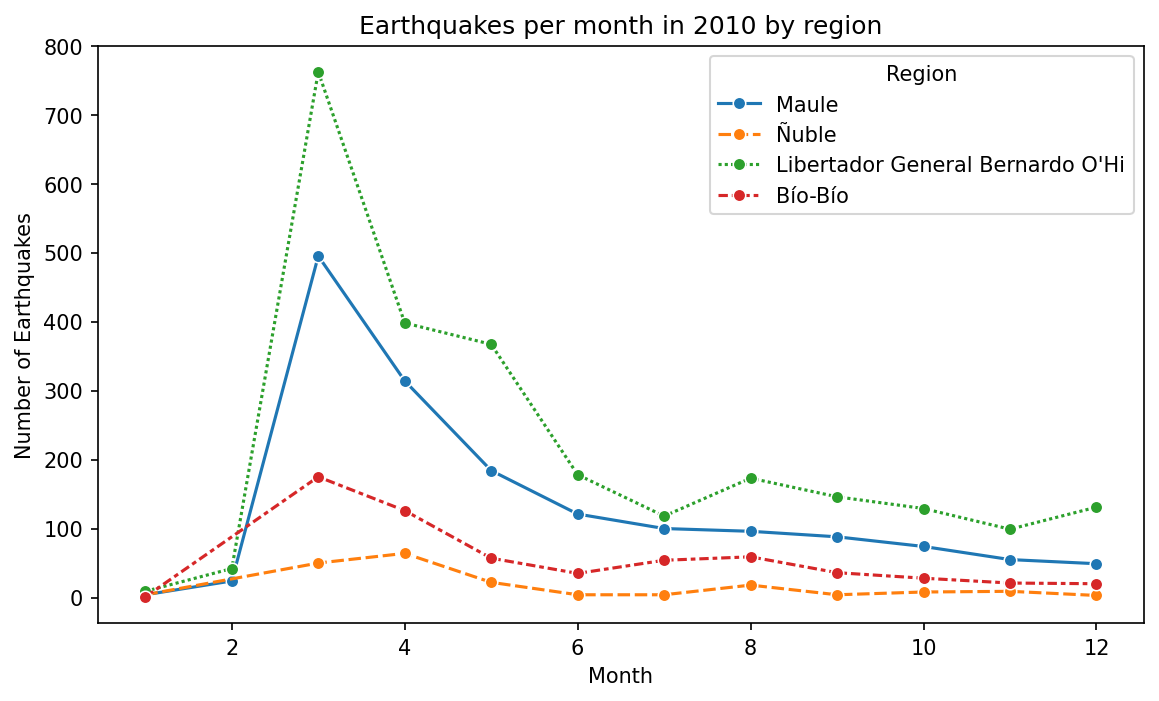

In [16]:
plt.figure(figsize=(9, 5), dpi=150)
sns.lineplot(
    data=df_earthquakes_by_month_2010,
    x="Month",
    y="n",
    hue="Region",
    marker="o",
    style="Region",
).set(xlabel="Month", ylabel="Number of Earthquakes")
plt.title("Earthquakes per month in 2010 by region")

2. Crea un gráfico de puntos (`sns.pointplot()`) que muestre la magnitud promedio de los sismos según la **hora del día** (0-23) para la región de Valparaíso, usando datos del año 2017. ¿Hay algún patrón en la distribución de magnitudes a lo largo del día?

In [17]:
df_earthquakes_valparaiso_2017 = (
    df_earthquakes.filter(
        pl.col("Region") == "Valparaíso",
        pl.col("Date").dt.year() == 2017,
    )
    .group_by(Hour=pl.col("UTC_Date").dt.hour())
    .agg(
        pl.col("Magnitude_Ml").mean()
    )
)

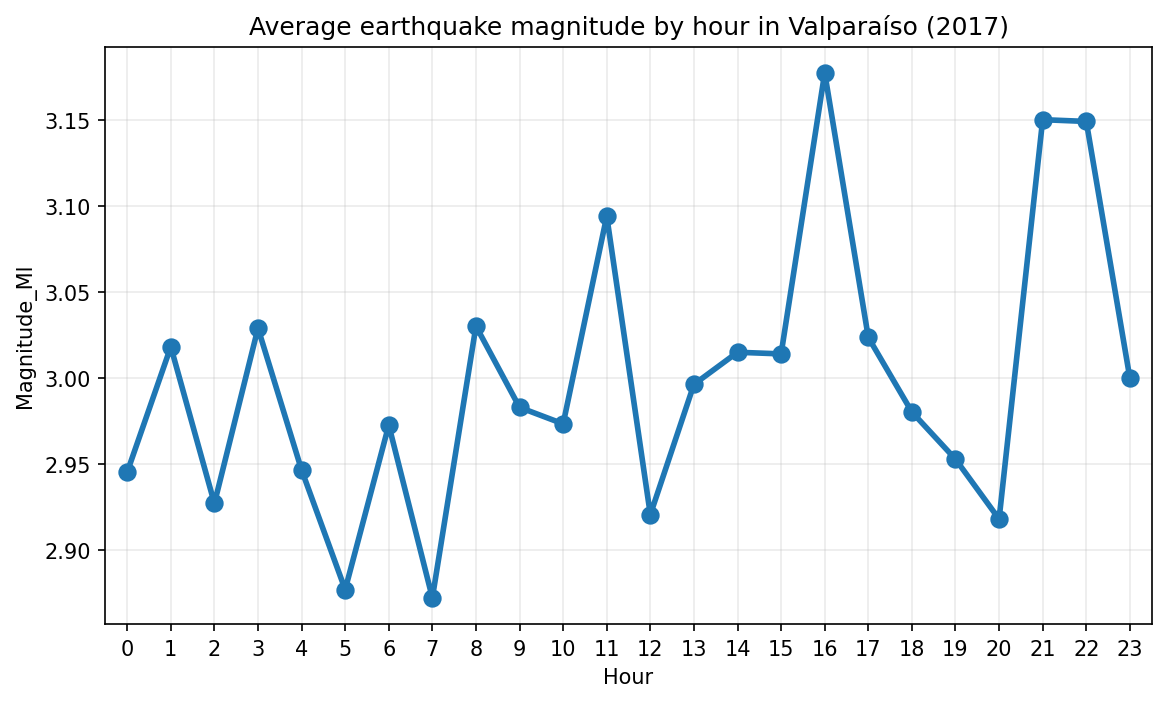

In [18]:
plt.figure(figsize=(9, 5), dpi=150)
sns.pointplot(
    data=df_earthquakes_valparaiso_2017,
    x='Hour',
    y='Magnitude_Ml',
)
plt.title("Average earthquake magnitude by hour in Valparaíso (2017)")
plt.grid(True, alpha=0.25)

3. Crea un gráfico de dispersión que relacione la tasa metabólica (`Metabolic rate (W)`) con la masa corporal (`Body mass (g)`) para animales de la clase Mammalia del dataset `anage`. Usa escalas logarítmicas en ambos ejes y transparencia. ¿Los animales más grandes tienen tasas metabólicas proporcionalmente más altas?

In [19]:
df_anage_mammalia = df_anage.filter(Class="Mammalia")

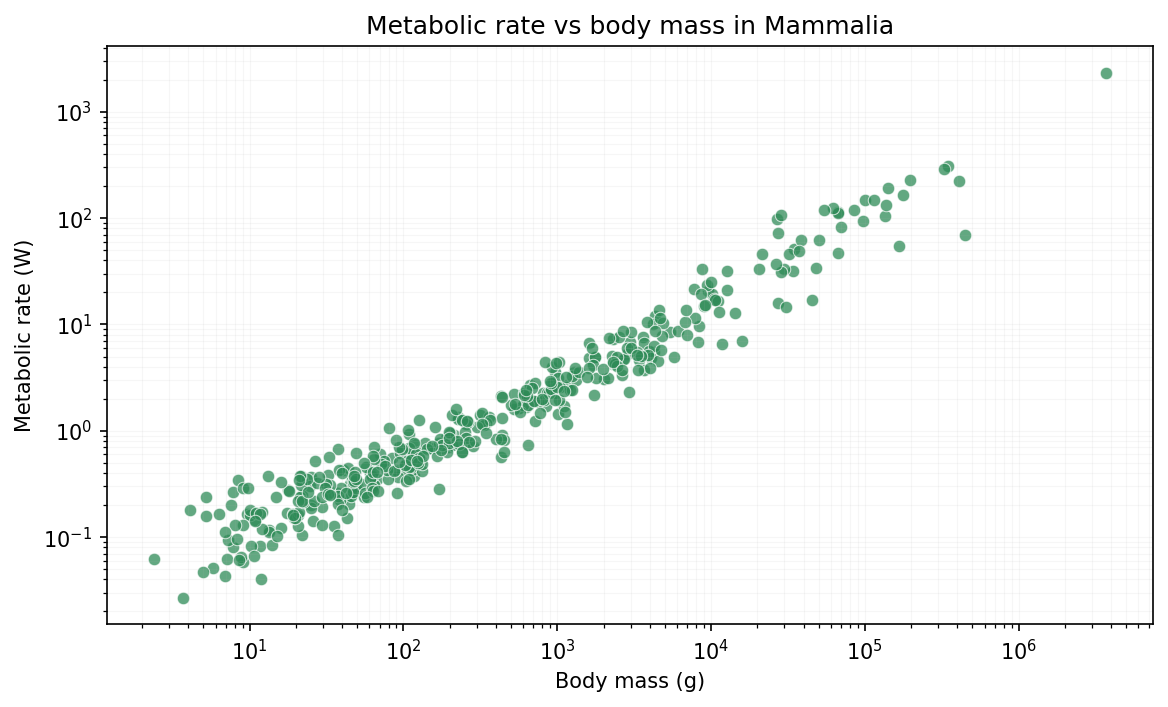

In [20]:
plt.figure(figsize=(9, 5), dpi=150)
ax = sns.scatterplot(
    data=df_anage_mammalia,
    x="Body mass (g)",
    y="Metabolic rate (W)",
    color='seagreen',
    alpha=0.75
)
ax.set(xscale="log", yscale="log")
plt.title("Metabolic rate vs body mass in Mammalia")
plt.grid(True, which="both", linewidth=0.5, alpha=0.1)

4. Crea un gráfico de dispersión que relacione la profundidad (`Profoundity_Km`) con la magnitud (`Magnitude_Ml`) de los sismos en la región de Antofagasta entre 2015 y 2020. Usa transparencia (`alpha=0.3`) para manejar el overplotting. ¿Existe alguna relación entre la profundidad y la magnitud de los sismos?

In [21]:
df_earthquakes_antofagasta_2015_2020 = (
    df_earthquakes.filter(
        pl.col("Region") == "Antofagasta",
        pl.col("Date").dt.year().is_between(2015, 2020),
    )
)

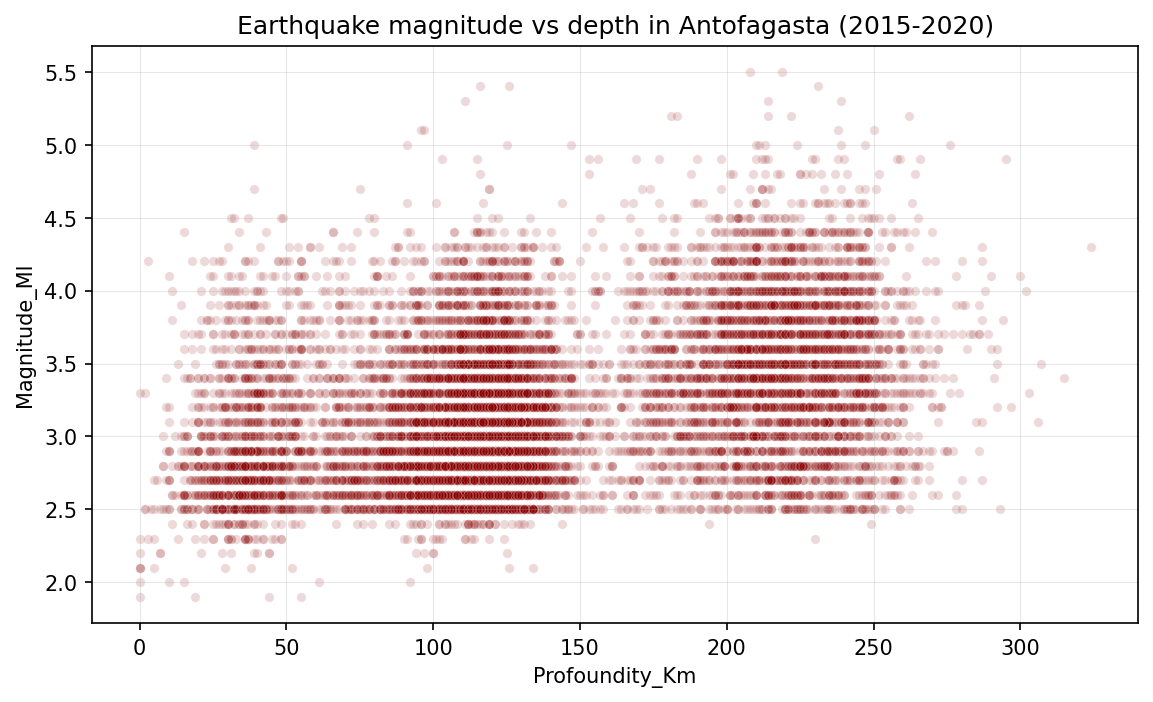

In [22]:
plt.figure(figsize=(9, 5), dpi=150)
ax = sns.scatterplot(
    data=df_earthquakes_antofagasta_2015_2020,
    x="Profoundity_Km",
    y="Magnitude_Ml",
    color='darkred',
    alpha=0.15,
    s=20
)
plt.title("Earthquake magnitude vs depth in Antofagasta (2015-2020)")
plt.grid(True, which="both", linewidth=0.5, alpha=0.3)

5. Crea un gráfico de dispersión que relacione el peso adulto (`Adult weight (g)`) con el peso al nacer (`Birth weight (g)`) para las clases Mammalia, Aves y Reptilia del dataset `anage`. Diferencia las clases por color (`hue`) y símbolo (`style`). Usa escalas logarítmicas en ambos ejes. ¿Qué clase muestra mayor proporción de crecimiento desde el nacimiento hasta la edad adulta?

In [23]:
df_anage_sub_classes = (
    df_anage.filter(pl.col("Class").is_in(["Mammalia", "Aves", "Reptilia"]))
    # ordena los datos para que el gráfico tenga una mejor apariencia
    .sort(
        pl.col("Class").replace({"Mammalia": 1, "Aves": 2, "Reptilia": 3})
    )
)

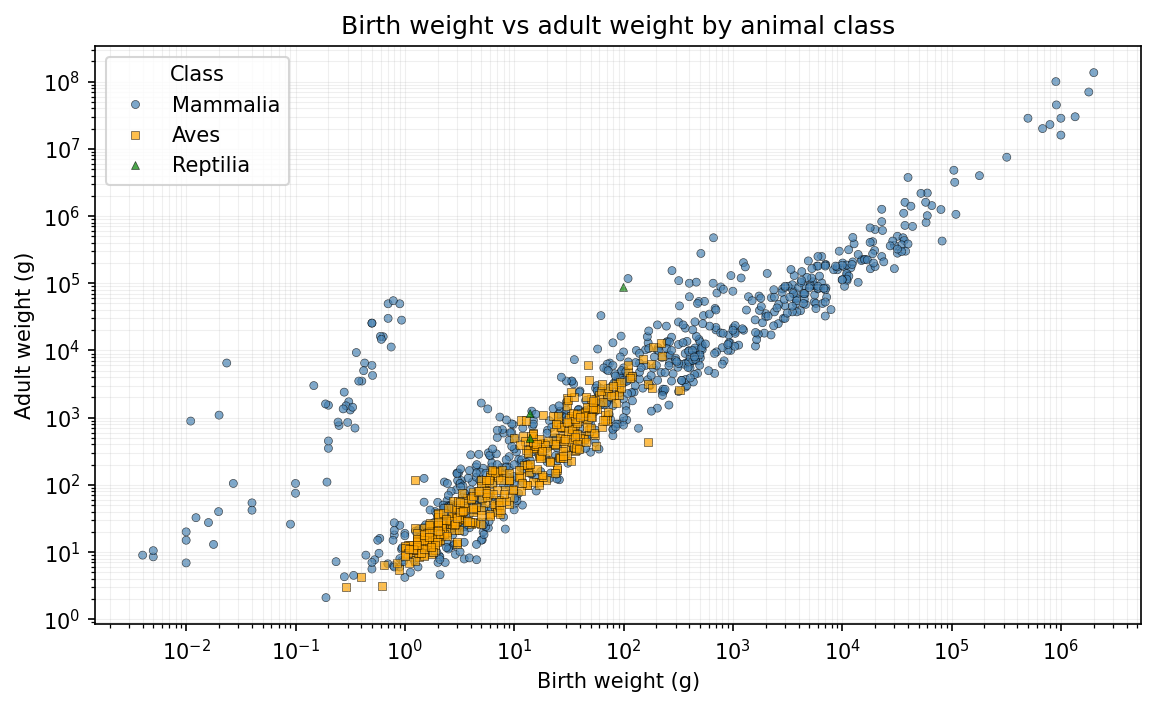

In [24]:
colors = {"Mammalia": "steelblue", "Aves": "orange", "Reptilia": "green"}
markers = {"Mammalia": "o", "Aves": "s", "Reptilia": "^"}

plt.figure(figsize=(9, 5), dpi=150)
ax = sns.scatterplot(
    data=df_anage_sub_classes,
    x="Birth weight (g)",
    y="Adult weight (g)",
    hue="Class",
    hue_order=["Mammalia", "Aves", "Reptilia"],
    style="Class",
    palette=colors,
    markers=markers,
    alpha=0.7,
    edgecolor="black",
    s=15,
)
ax.set(xscale="log", yscale="log")
plt.title("Birth weight vs adult weight by animal class")
plt.grid(True, alpha=0.2, linewidth=0.5, which='both')
